# Pymaceuticals Inc.
---

# Analysis

Capomulin and Ramicane are the most effective drug regimens in reducing tumor volume, because they show the smallest average final tumor volume and the smallest IQRs compared to the other drug regimens.

There is a strong positive correlation between mouse weight and tumor volume for the Capomulin regimen, as evidenced by the high correlation coefficient (0.84) between these two variables.

The number of male and female mice in the study is almost equal, with 49.4% female mice and 50.6% male mice.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
minor_df = pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
minor_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
num_mice = minor_df['Mouse ID'].nunique()
num_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data = minor_df[minor_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse_id = duplicate_data['Mouse ID'].unique()
duplicate_mouse_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = minor_df[minor_df['Mouse ID'].isin(duplicate_mouse_id)]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = minor_df[~minor_df['Mouse ID'].isin(duplicate_mouse_id)]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'].unique())


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
grouped_by_regimen = clean_df.groupby('Drug Regimen')

mean_tumor_volume = grouped_by_regimen['Tumor Volume (mm3)'].mean()
median_tumor_volume = grouped_by_regimen['Tumor Volume (mm3)'].median()
variance_tumor_volume = grouped_by_regimen['Tumor Volume (mm3)'].var()
std_dev_tumor_volume = grouped_by_regimen['Tumor Volume (mm3)'].std()
sem_tumor_volume = grouped_by_regimen['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Tumor Volume Variance': variance_tumor_volume,
    'Tumor Volume Std. Dev.': std_dev_tumor_volume,
    'Tumor Volume SEM': sem_tumor_volume
})

summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    ['mean', 'median', 'var', 'std', 'sem']
)

summary_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

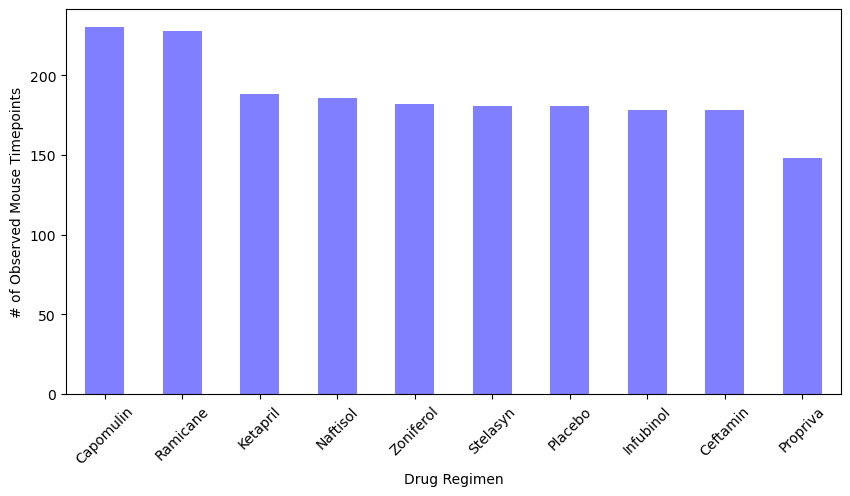

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
rows_per_regimen = clean_df['Drug Regimen'].value_counts()

rows_per_regimen.plot(kind='bar', figsize=(10, 5), rot=45, color='blue', alpha=0.5)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()

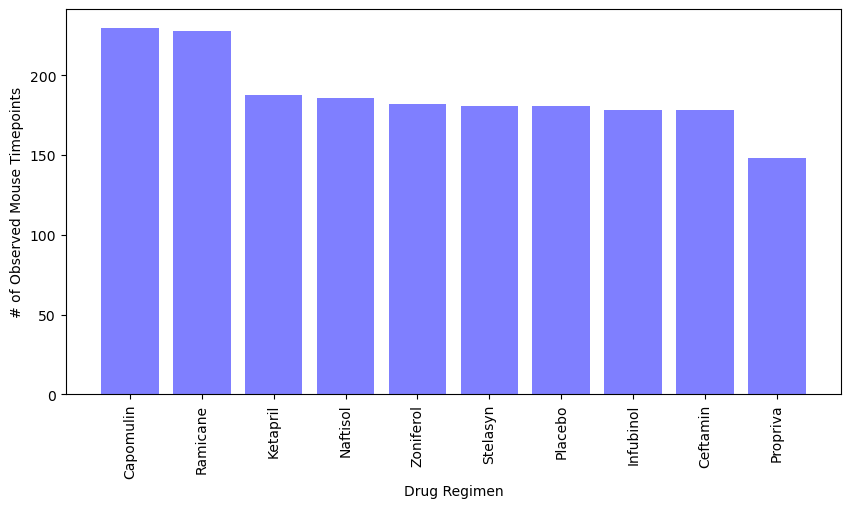

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
rows_per_regimen = clean_df['Drug Regimen'].value_counts()

x_labels = rows_per_regimen.index
x_positions = np.arange(len(x_labels))

plt.figure(figsize=(10, 5))
plt.bar(x_positions, rows_per_regimen, color='blue', alpha=0.5, align='center')

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.xticks(x_positions, x_labels, rotation=90)

plt.show()

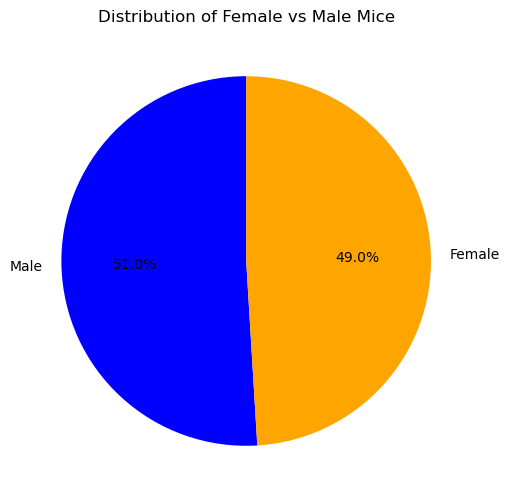

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = clean_df['Sex'].value_counts()

gender_distribution.plot(kind='pie', figsize=(6, 6), autopct='%1.1f%%', startangle=90, colors=['blue', 'orange'])

plt.title("Distribution of Female vs Male Mice")

plt.ylabel("")

plt.show()

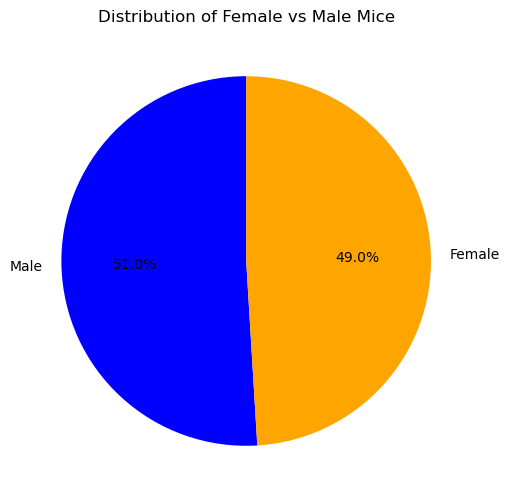

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_distribution = clean_df['Sex'].value_counts()

# Generate a pie plot using pyplot
plt.figure(figsize=(6, 6))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange'])

# Set the title for the plot
plt.title("Distribution of Female vs Male Mice")

# Show the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
filtered_df = clean_df[clean_df['Drug Regimen'].isin(treatment_regimens)]

max_timepoint_df = filtered_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_vol_df = pd.merge(max_timepoint_df, filtered_df, on=['Mouse ID', 'Timepoint'])

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in treatment_regimens:
# Locate the rows which contain mice on each drug and get the tumor volumes    
    tumor_vol_data = final_tumor_vol_df.loc[final_tumor_vol_df['Drug Regimen'] == regimen, 'Tumor Volume (mm3)']
# add subset     
    tumor_volumes.append(tumor_vol_data)
    
    quartiles = tumor_vol_data.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    outliers = tumor_vol_data.loc[(tumor_vol_data < lower_bound) | (tumor_vol_data > upper_bound)]  
# Determine outliers using upper and lower bounds 
    if len(outliers) > 0:
        print(f"{regimen} potential outliers: {outliers}")
    else:
        print(f"No potential outliers for {regimen}")

No potential outliers for Capomulin
No potential outliers for Ramicane
Infubinol potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
No potential outliers for Ceftamin


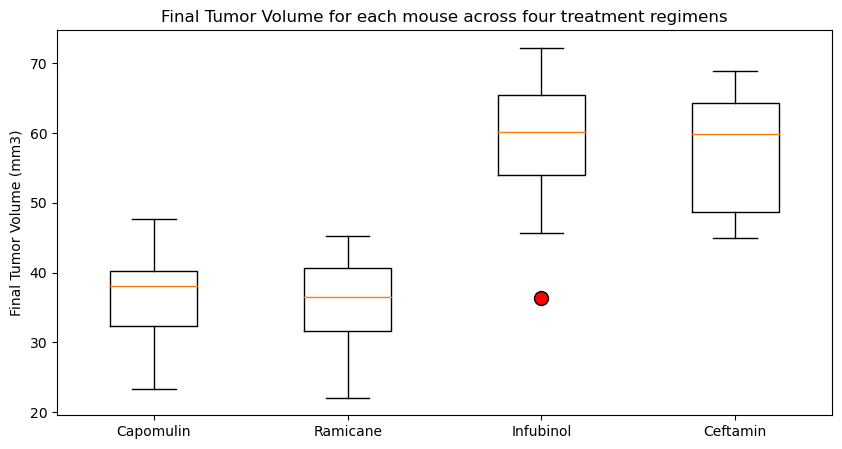

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots(figsize=(10, 5))
ax.boxplot(tumor_volumes, labels=treatment_regimens, flierprops={'markerfacecolor': 'red', 'markersize': 10})

ax.set_title("Final Tumor Volume for each mouse across four treatment regimens")
ax.set_ylabel("Final Tumor Volume (mm3)")

plt.show()

## Line and Scatter Plots

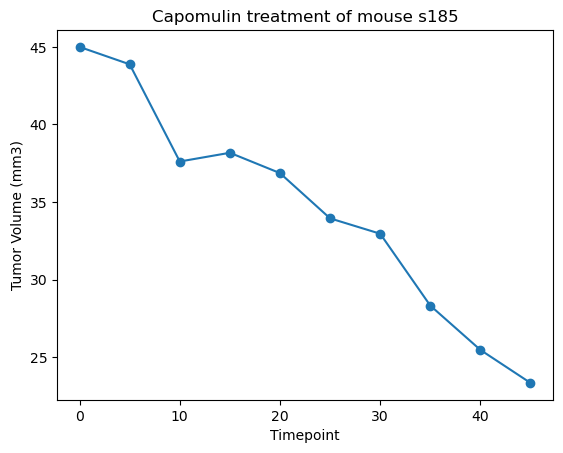

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

mouse_id = 's185'

mouse_df = capomulin_df[capomulin_df['Mouse ID'] == mouse_id]

fig, ax = plt.subplots()
ax.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'], marker='o')

ax.set_title(f"Capomulin treatment of mouse {mouse_id}")
ax.set_xlabel("Timepoint")
ax.set_ylabel("Tumor Volume (mm3)")

plt.show()

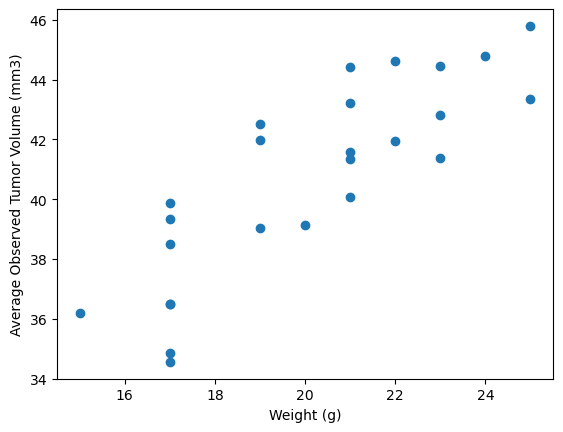

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

capomulin_grouped = capomulin_df.groupby('Mouse ID')[['Weight (g)', 'Tumor Volume (mm3)']].mean()

fig, ax = plt.subplots()
ax.scatter(capomulin_grouped['Weight (g)'], capomulin_grouped['Tumor Volume (mm3)'])

ax.set_xlabel("Weight (g)")
ax.set_ylabel("Average Observed Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

Correlation coefficient between mouse weight and average observed tumor volume: 0.84


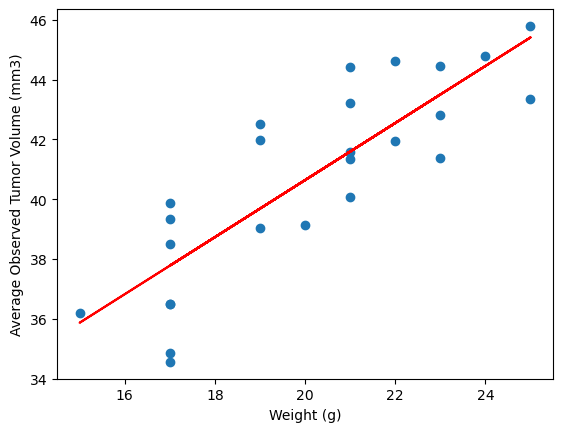

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import pearsonr, linregress

capomulin_df = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

capomulin_grouped = capomulin_df.groupby('Mouse ID')[['Weight (g)', 'Tumor Volume (mm3)']].mean()

corr, _ = pearsonr(capomulin_grouped['Weight (g)'], capomulin_grouped['Tumor Volume (mm3)'])
print(f"Correlation coefficient between mouse weight and average observed tumor volume: {corr:.2f}")

slope, intercept, rvalue, pvalue, stderr = linregress(capomulin_grouped['Weight (g)'], capomulin_grouped['Tumor Volume (mm3)'])

fig, ax = plt.subplots()
ax.scatter(capomulin_grouped['Weight (g)'], capomulin_grouped['Tumor Volume (mm3)'])

fit = slope * capomulin_grouped['Weight (g)'] + intercept
ax.plot(capomulin_grouped['Weight (g)'], fit, '-', color='red')

ax.set_xlabel("Weight (g)")
ax.set_ylabel("Average Observed Tumor Volume (mm3)")

plt.show()